In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [2]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Уменьшение размера сети

In [7]:
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])
original_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_8 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [8]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(6, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(6, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])
smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 6)                 60006     
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 7         
Total params: 60,055
Trainable params: 60,055
Non-trainable params: 0
_________________________________________________________________


In [5]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 13s 516us/step - loss: 0.4440 - acc: 0.8251 - val_loss: 0.3286 - val_acc: 0.8834
Epoch 2/20
25000/25000 [==============================] - 10s 419us/step - loss: 0.2572 - acc: 0.9078 - val_loss: 0.2864 - val_acc: 0.8882
Epoch 3/20
25000/25000 [==============================] - 9s 352us/step - loss: 0.1991 - acc: 0.9293 - val_loss: 0.2821 - val_acc: 0.8889
Epoch 4/20
25000/25000 [==============================] - 8s 338us/step - loss: 0.1668 - acc: 0.9415 - val_loss: 0.2941 - val_acc: 0.8846
Epoch 5/20
25000/25000 [==============================] - 9s 351us/step - loss: 0.1437 - acc: 0.9498 - val_loss: 0.3118 - val_acc: 0.8804
Epoch 6/20
25000/25000 [==============================] - 9s 347us/step - loss: 0.1262 - acc: 0.9554 - val_loss: 0.3495 - val_acc: 0.8717
Epoch 7/20
25000/25000 [==============================] - 9s 350us/step - loss: 0.1110 - acc: 0.9616 - val_loss: 0.3599 

In [6]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 8s 338us/step - loss: 0.5670 - acc: 0.7410 - val_loss: 0.4849 - val_acc: 0.8256
Epoch 2/20
25000/25000 [==============================] - 9s 368us/step - loss: 0.3924 - acc: 0.8895 - val_loss: 0.3608 - val_acc: 0.8781
Epoch 3/20
25000/25000 [==============================] - 8s 322us/step - loss: 0.2791 - acc: 0.9175 - val_loss: 0.3012 - val_acc: 0.8879
Epoch 4/20
25000/25000 [==============================] - 8s 327us/step - loss: 0.2214 - acc: 0.9279 - val_loss: 0.2823 - val_acc: 0.8900
Epoch 5/20
25000/25000 [==============================] - 9s 379us/step - loss: 0.1877 - acc: 0.9375 - val_loss: 0.2815 - val_acc: 0.8868
Epoch 6/20
25000/25000 [==============================] - 8s 314us/step - loss: 0.1649 - acc: 0.9449 - val_loss: 0.2858 - val_acc: 0.8856
Epoch 7/20
25000/25000 [==============================] - 8s 319us/step - loss: 0.1467 - acc: 0.9519 - val_loss: 0.2957 - 

In [9]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

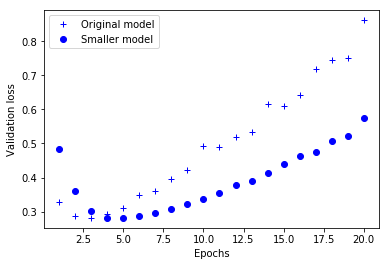

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

# b+ is for "blue cross"
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [ ]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [ ]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

In [ ]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [ ]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

## Регуляризация весов

In [11]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [13]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 9s 356us/step - loss: 0.4850 - acc: 0.8252 - val_loss: 0.3891 - val_acc: 0.8680
Epoch 2/20
25000/25000 [==============================] - 8s 321us/step - loss: 0.3142 - acc: 0.9058 - val_loss: 0.3521 - val_acc: 0.8774
Epoch 3/20
25000/25000 [==============================] - 8s 327us/step - loss: 0.2696 - acc: 0.9214 - val_loss: 0.3316 - val_acc: 0.8867
Epoch 4/20
25000/25000 [==============================] - 8s 329us/step - loss: 0.2474 - acc: 0.9296 - val_loss: 0.3315 - val_acc: 0.8869
Epoch 5/20
25000/25000 [==============================] - 8s 323us/step - loss: 0.2386 - acc: 0.9324 - val_loss: 0.3407 - val_acc: 0.8834
Epoch 6/20
25000/25000 [==============================] - 8s 324us/step - loss: 0.2280 - acc: 0.9361 - val_loss: 0.3495 - val_acc: 0.8823
Epoch 7/20
25000/25000 [==============================] - 8s 327us/step - loss: 0.2222 - acc: 0.9396 - val_loss: 0.3523 - 

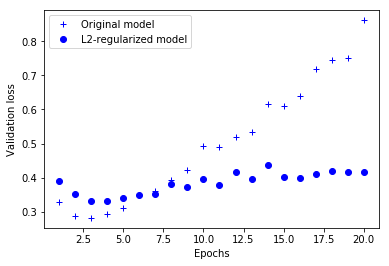

In [14]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [ ]:
from keras import regularizers

# L1 regularization
regularizers.l1(0.001)

# L1 and L2 regularization at the same time
regularizers.l1_l2(l1=0.001, l2=0.001)

## прореживание

In [ ]:
# At training time: we drop out 50% of the units in the output
#layer_output *= np.randint(0, high=2, size=layer_output.shape)

In [ ]:
# At test time:
#layer_output *= 0.5

In [ ]:
# At training time:
#layer_output *= np.randint(0, high=2, size=layer_output.shape)
# Note that we are scaling *up* rather scaling *down* in this case
#layer_output /= 0.5

In [ ]:
#model.add(layers.Dropout(0.5))

In [15]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [16]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 9s 380us/step - loss: 0.5590 - acc: 0.7174 - val_loss: 0.4084 - val_acc: 0.8623
Epoch 2/20
25000/25000 [==============================] - 9s 360us/step - loss: 0.4039 - acc: 0.8414 - val_loss: 0.3117 - val_acc: 0.8860
Epoch 3/20
25000/25000 [==============================] - 9s 343us/step - loss: 0.3308 - acc: 0.8835 - val_loss: 0.2865 - val_acc: 0.8895
Epoch 4/20
25000/25000 [==============================] - 9s 375us/step - loss: 0.2790 - acc: 0.9046 - val_loss: 0.2800 - val_acc: 0.8882
Epoch 5/20
25000/25000 [==============================] - 9s 367us/step - loss: 0.2445 - acc: 0.9191 - val_loss: 0.2897 - val_acc: 0.8890
Epoch 6/20
25000/25000 [==============================] - 8s 340us/step - loss: 0.2205 - acc: 0.9285 - val_loss: 0.3015 - val_acc: 0.8835
Epoch 7/20
25000/25000 [==============================] - 9s 345us/step - loss: 0.1963 - acc: 0.9377 - val_loss: 0.3204 - 

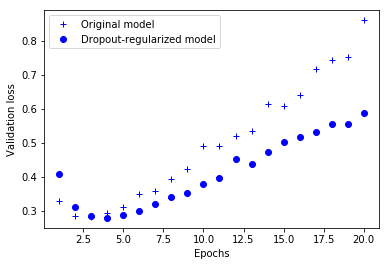

In [17]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()